In [6]:
import spacy
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
nlp = spacy.load('en_core_web_sm')
df = pd.read_json('../Dataset_Clean.json')

In [8]:
# --- Verb Extraction ---
all_verbs = []
for doc in nlp.pipe(df['text']):
    verbs = [token.lemma_.lower() for token in doc if token.pos_ == 'VERB' and not token.is_stop]
    all_verbs.extend(verbs)
verb_counts = Counter(all_verbs)
top_verbs_df = pd.DataFrame(verb_counts.most_common(20), columns=['Verb', 'Frequency'])

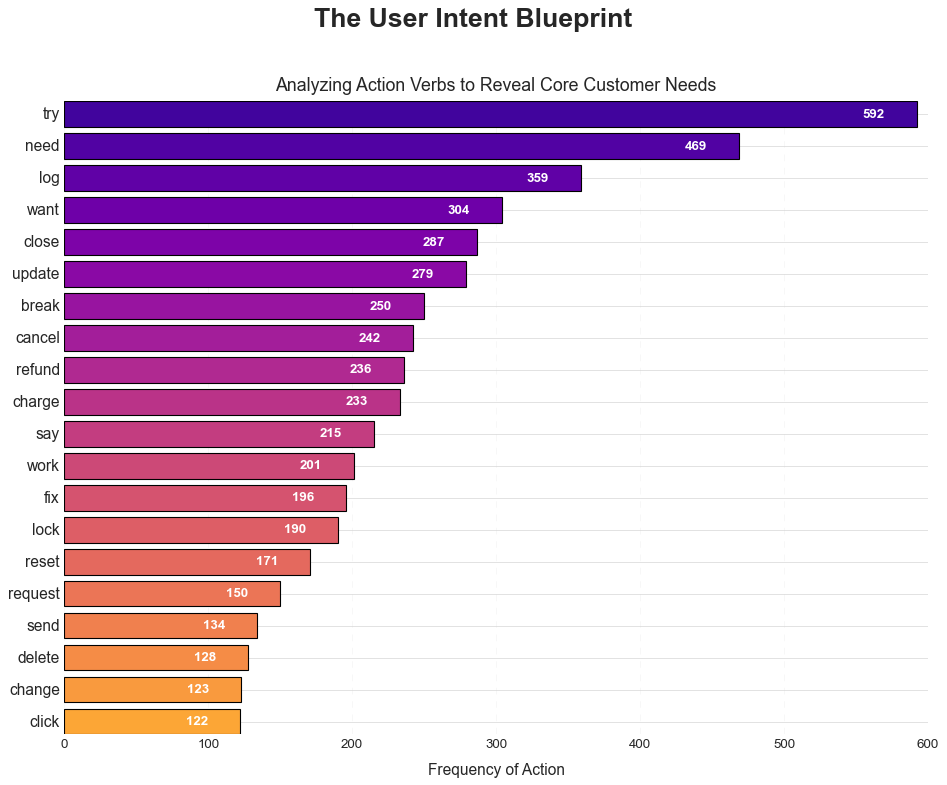

In [10]:
# --- The Professional Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 10))
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0.1, 0.8, len(top_verbs_df)))

# Create the horizontal bar plot
bars = ax.barh(top_verbs_df['Verb'], top_verbs_df['Frequency'], color=colors)

# --- Title and Subtitle ---
fig.suptitle('The User Intent Blueprint', fontsize=24, weight='bold')
ax.set_title('Analyzing Action Verbs to Reveal Core Customer Needs', fontsize=16, pad=10)

# --- Annotations and Styling ---
ax.invert_yaxis() # Puts the most frequent verb at the top
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Frequency of Action', fontsize=14, labelpad=10)
ax.xaxis.grid(True, linestyle='--', which='major', alpha=.25)

# Remove chart junk
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add data labels inside the bars for a clean look
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - (ax.get_xlim()[1] * 0.05) # Position label inside
    if label_x_pos < 0: label_x_pos = 1 # Prevent negative position
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}',
            ha='center', va='center', color='white', weight='bold', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()